**Importing Libraries**

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

**Upload Dataset**

In [6]:
data = pd.read_csv("water.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


**Remove null values**

In [7]:
data = data.dropna()
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


**Potability Column Distribution**

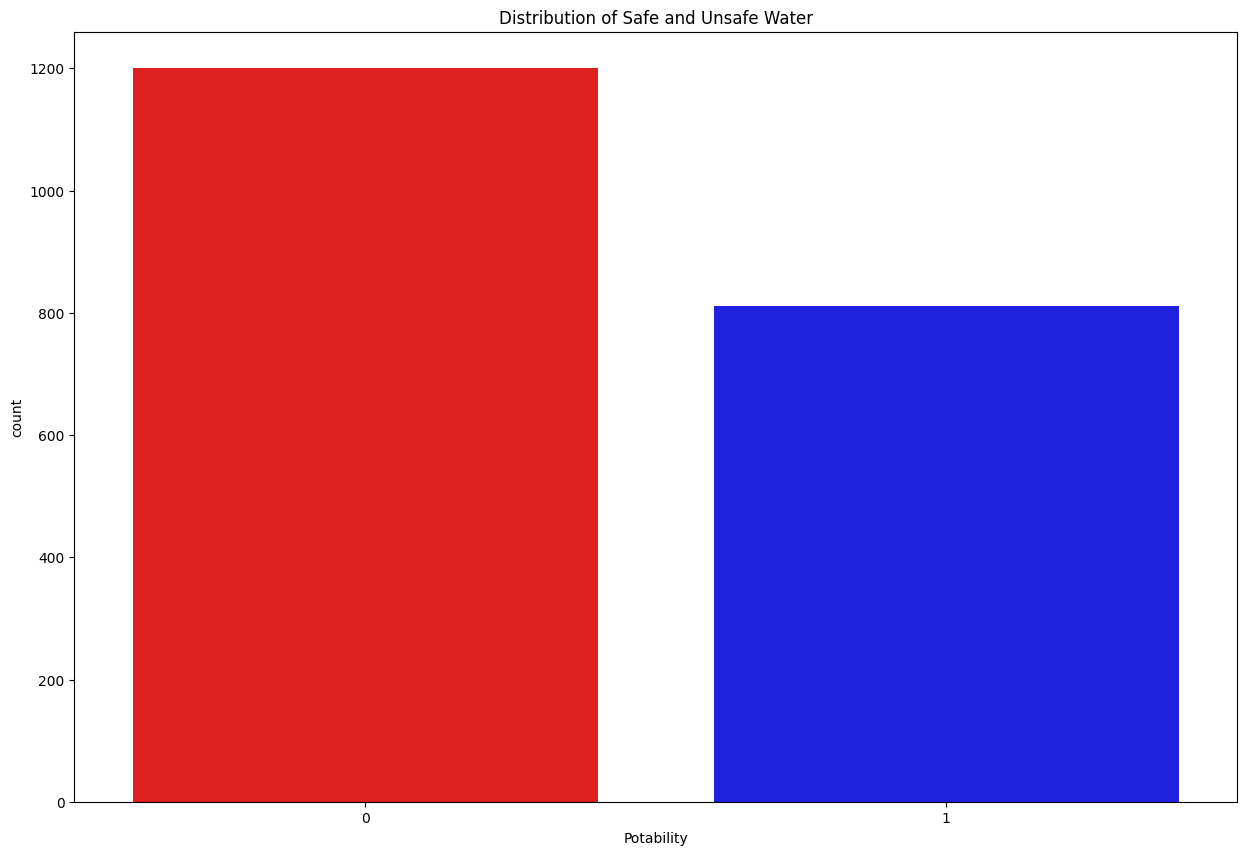

In [31]:
plt.figure(figsize=(15, 10))
sns.countplot(data = data,
              x = 'Potability',
              palette=['red', 'blue'])
plt.title('Distribution of Safe and Unsafe Water')
plt.show()

**Effect of pH on Water Quality**

Text(0.5, 1.0, 'Effect of pH on Water Quality')

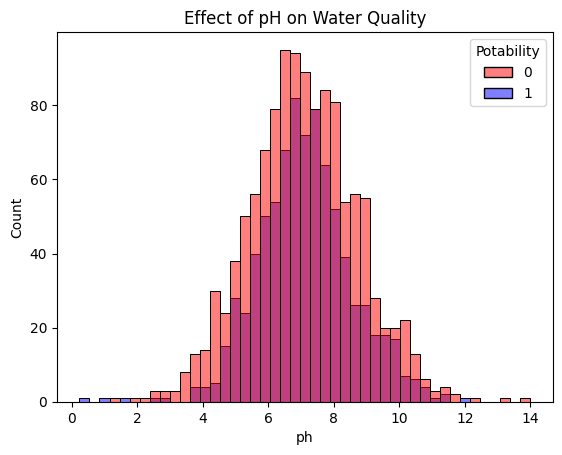

In [32]:
figure = sns.histplot(data = data,
                  x = 'ph',
                  hue = 'Potability',
                   palette=['red', 'blue'])
plt.title('Effect of pH on Water Quality')

Most of the data has a pH between 6-8. This is to be expected, since water typically has a neutral pH of ~ 7.

**Effect of Hardness on Water Quality**

Text(0.5, 1.0, 'Effect of Hardness on Water Quality')

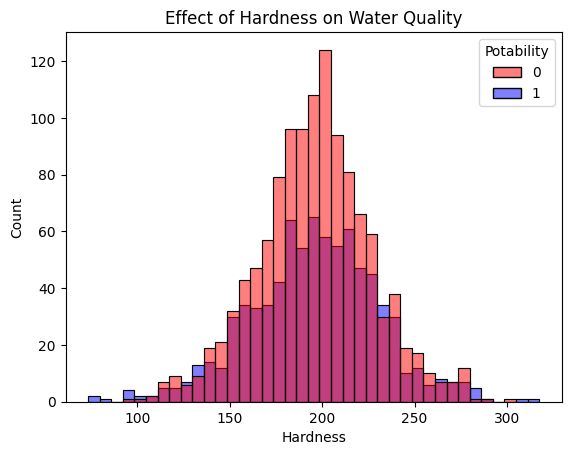

In [34]:
figure = sns.histplot(data = data,
                  x = 'Hardness',
                  hue = 'Potability',
                  palette=['red', 'blue'])
plt.title('Effect of Hardness on Water Quality')

The water in the data typically has a hardness ~ 200 mg, which is considered safe to drink.

**Effect of Solids on Water Quality**

Text(0.5, 1.0, 'Effect of Solids on Water Quality')

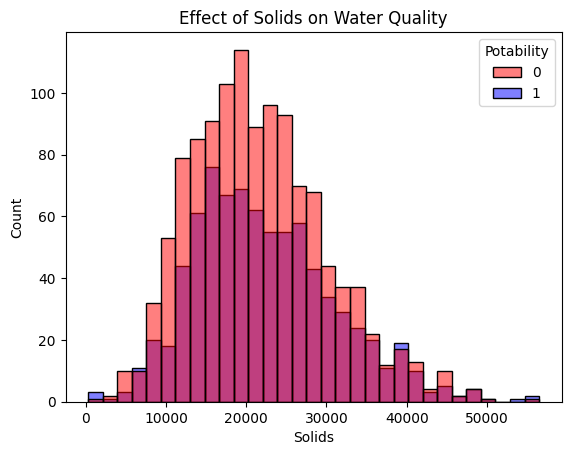

In [35]:
figure = sns.histplot(data = data,
                  x = 'Solids',
                  hue = 'Potability',
                  palette=['red', 'blue'])
plt.title('Effect of Solids on Water Quality')

Solids refers to the amount of dissolved minerals in the water.

**Effect of Chloramines on Water Quality**

Text(0.5, 1.0, 'Effect of Chloramines on Water Quality')

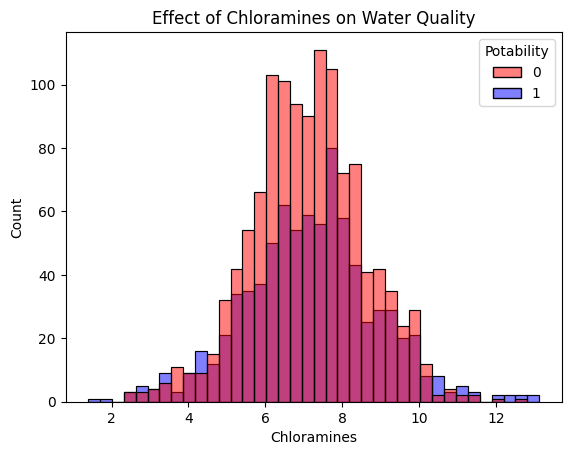

In [36]:
figure = sns.histplot(data = data,
                  x = 'Chloramines',
                  hue = 'Potability',
                  palette=['red', 'blue'])
plt.title('Effect of Chloramines on Water Quality')

Chloramine is a disinfectant used in public water systems.

** Effect of Sulfate on Water Quality**

Text(0.5, 1.0, 'Effect of Sulfate on Water Quality')

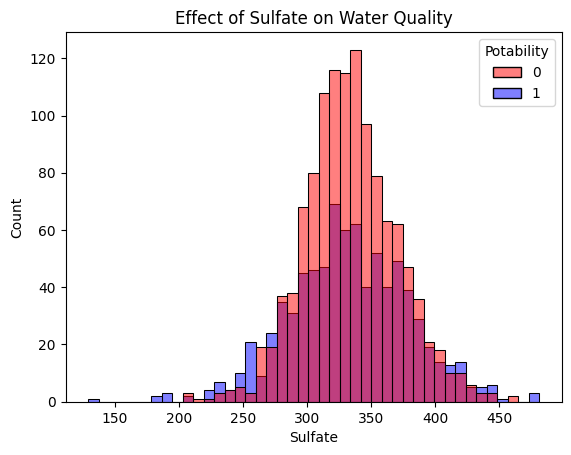

In [37]:
figure = sns.histplot(data = data,
                  x = 'Sulfate',
                  hue = 'Potability',
                  palette=['red', 'blue'])
plt.title('Effect of Sulfate on Water Quality')

Sulfate is naturally found in water from the surrounding environment.

** Effect of Conductivity on Water Quality**

Text(0.5, 1.0, 'Effect of Conductivity on Water Quality')

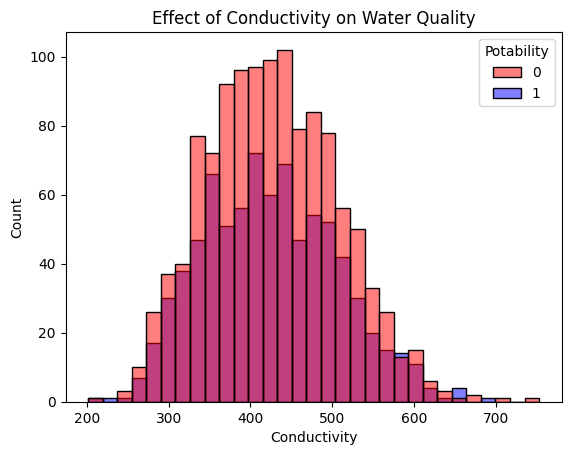

In [38]:
figure = sns.histplot(data = data,
                  x = 'Conductivity',
                  hue = 'Potability',
                  palette=['red', 'blue'])
plt.title('Effect of Conductivity on Water Quality')

Water with higher conductivity contains more dissolved salts/chemicals.

**Effect of Organic Carbon on Water Quality**

Text(0.5, 1.0, 'Effect of Organic Carbons on Water Quality')

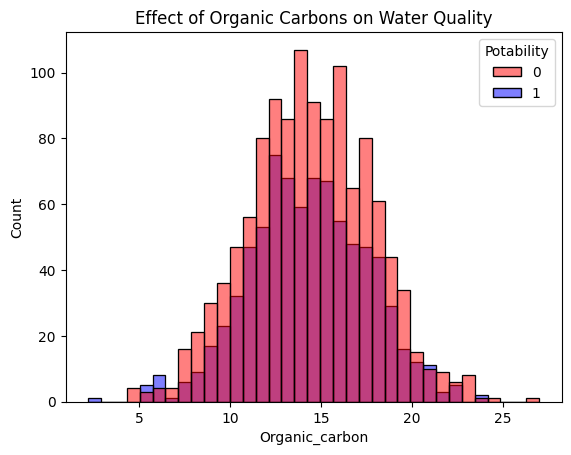

In [39]:
figure = sns.histplot(data = data,
                  x = 'Organic_carbon',
                  hue = 'Potability',
                  palette=['red', 'blue'])
plt.title('Effect of Organic Carbons on Water Quality')

Water with higher organic_carbon values have more dissolved organic compounds.

**Effect of Trihalomethanes on Water Quality**

Text(0.5, 1.0, 'Effect of Trihalomethanes on Water Quality')

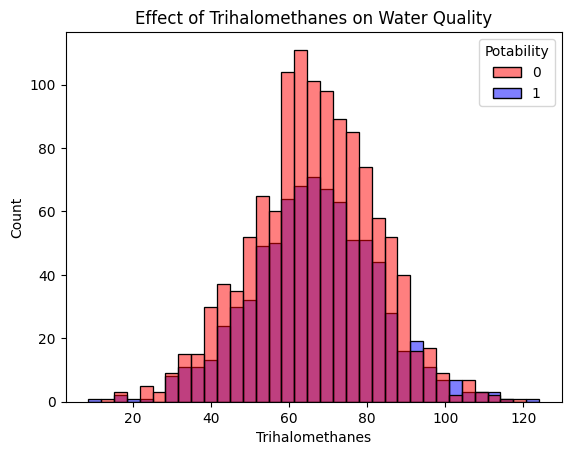

In [40]:
figure = sns.histplot(data = data,
                  x = 'Trihalomethanes',
                  hue = 'Potability',
                  palette=['red', 'blue'])
plt.title('Effect of Trihalomethanes on Water Quality')

Trihalomethanes are a chemical found in chlorine-treated water. This is due to a chemical reaction between the chlorine and organic matter dissolved in the water. The drinking water limit for trihalomethanes is 80 ug/L according to OSHA.

**Effect of Turbidity on Water Quality**

Text(0.5, 1.0, 'Effect of Turbidity on Water Quality')

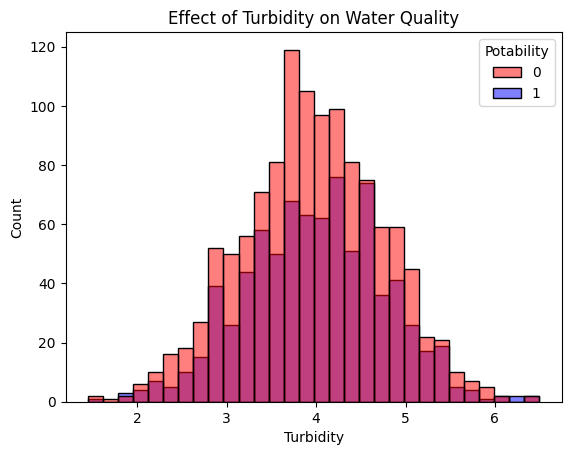

In [41]:
figure = sns.histplot(data = data,
                  x = 'Turbidity',
                  hue = 'Potability',
                  palette=['red', 'blue'])
plt.title('Effect of Turbidity on Water Quality')

Turbidity is caused by particles suspended/dissolved in water that scatter light, making the water appear cloudy or murky.

**Create model to predict whether water is potable**

Predicting whether water is potable or not using several different model to see which is the best for predicting this dataset.

In [44]:
X = data.drop('Potability', axis = 1)
y = data['Potability']

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Models used:

In [45]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

Model Evaluation

In [59]:
for model in models:
  #Module name
  name = model.__class__.__name__

  #Fit model
  model.fit(X_train, y_train)

  #Predict
  y_pred = model.predict(X_test)

  #Calculate model metrics
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  roc = roc_auc_score(y_test, y_pred)

  print(name)
  print(f'Accuracy: {accuracy:.2f}\n')
  print(f'F1: {f1:.2f}\n')
  print(f'Precision: {precision:.2f}\n')
  print(f'Recall: {recall:.2f}\n')
  print(f'ROC AUC: {roc:.2f}\n')


LogisticRegression
Accuracy: 0.64

F1: 0.08

Precision: 0.67

Recall: 0.04

ROC AUC: 0.51

DecisionTreeClassifier
Accuracy: 0.60

F1: 0.47

Precision: 0.47

Recall: 0.47

ROC AUC: 0.58

RandomForestClassifier
Accuracy: 0.68

F1: 0.50

Precision: 0.61

Recall: 0.42

ROC AUC: 0.63



* RandomForest has the highest accuracy at 68%

* LogisticRegression has the highest precision at 67%

* DecisionClassifier has the highest recall at 51%

* RandomForest has the highest ROC AUC at 62%